# Исследование рынка продаж в игровой сфере

В нашем распоряжении данные о продажах в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Цель проекта: выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы проданных копий)
 - EU_sales — продажи в Европе (миллионы проданных копий)
 - JP_sales — продажи в Японии (миллионы проданных копий)
 - Other_sales — продажи в других странах (миллионы проданных копий)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


План проекта:
    
    1. Предбоработка данных (исправление наваний столбцов, преобразование типов данных, обработка пропусков)
    2. Проведение исследовательского анализа данных   (кол-во выпускаемых игр по годам, определение актуального периоды для прогноза на 2017 год, определение лидирующих платформ, определение наиболее популярных и прибыльных жанров) 
    3. Составление портрета пользователя для каждого региона
    4. Проверка статистических гипотез
    5. Общий вывод


## Выгрузка и предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Изменение названий столбцов

In [4]:
data.columns = data.columns.str.lower() #приведение навзваний столбоц к нижнему регистру

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразование типов данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для того, чтобы заменить тип данных в столбце 'user_score', нужно сразу заменить аббревиатуру 'tbd' (to be determined), что значит, что оценка пока не выставлена. Предлагаю заменить такие значение на Nan, а тип данных на 'float'

In [7]:
data['user_score'].replace('tbd', "NaN", inplace=True)

In [8]:
data['user_score'] = data['user_score'].astype('float', copy=False)
#data.info()

In [9]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [10]:
#data['critic_score'] = data['critic_score'].astype('int64')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Вывод: типы данных были изменены в трех столбцах "user_score", "year_of_release" и "critic_score". В первом случае оценка пользователя - число с плавающей точкой, а оценка критиков и год релиза - целые числа, формат для которых был выбран Int64, а не просто int, так как такой тип данных может содержать пропуски.

P.S. Рассчитывая корреляцию, столкнулся с ошибкой, которая была связана именно с использованием типа данных Int, поэтому пришлось исправить... Заметным это дело стало только под конец работы, вроде, на результат исследования не повлияло

### Обработка пропусков

In [12]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [13]:
#процент пропущенных значений
for col in data.columns:
    print(f'{col} : {data[col].isna().sum() / data.shape[0] * 100:.2f}%')

name : 0.01%
platform : 0.00%
year_of_release : 1.61%
genre : 0.01%
na_sales : 0.00%
eu_sales : 0.00%
jp_sales : 0.00%
other_sales : 0.00%
critic_score : 51.32%
user_score : 54.59%
rating : 40.48%


In [14]:
#проверка на явные дубликаты
data.duplicated().sum()

0

In [15]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [16]:
data['user_score'] = data['user_score'].fillna(-1)

In [17]:
data['rating'] = data['rating'].fillna('no_rating')
data['rating'] = data['rating'].astype('object')

In [18]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,no_rating
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,no_rating


In [19]:
data.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [20]:
data.groupby('rating')['critic_score'].median()

rating
AO           93.0
E            62.0
E10+         63.0
EC           -1.0
K-A          -1.0
M            74.0
RP           63.0
T            69.0
no_rating    -1.0
Name: critic_score, dtype: float64

In [21]:
data.groupby('rating')['user_score'].median()

rating
AO           8.6
E            5.5
E10+         6.5
EC          -1.0
K-A          8.1
M            7.5
RP           3.8
T            7.3
no_rating   -1.0
Name: user_score, dtype: float64

Заметна путаница в категоризации данных по рейтингу - категории пересекаются, не давая, по факту, никакой достоверной информации. Честно говоря, не очень понимаю, как быть с этими данными, так как это не только рейтинг, но и возрастная категория

### Добавление столбца суммарные продажи

In [22]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating


In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [24]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38


In [25]:
data.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
total_sales          0
dtype: int64

__Вывод по первой части:__ 
- замена пропусков осуществялась на -1, так как с такими значениями мы впоследствии сможем работать, анпример, через срезы или логическую индексацию
- замечана несостыковка данных в столбце 'rating'
- было принято решение не удалять пропуски в столбцах, где они есть, чтобы не потерять возможные ценные данные

## Исследовательский анализ данных

In [26]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38


### Динамика выпуска игр по годам

In [27]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year.sort_values(by='name')

,name
year_of_release,
1980,9
1984,14
1985,14
1988,15
1990,16
1987,16
1989,17
1983,17
1986,21


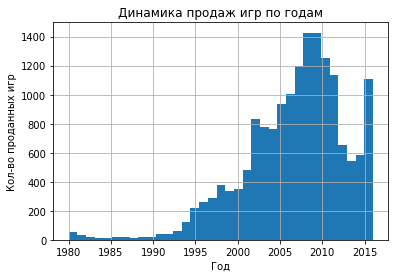

In [28]:
data['year_of_release'].hist(bins=35)
plt.title("Динамика продаж игр по годам")
plt.xlabel('Год')
plt.ylabel('Кол-во проданных игр')
plt.show()

__Выводы по графику:__
- График скошен влево, ассиметричен;
- Рост выпускаемых игр начинается примерно с 1995 года, кол-во выпусков до этого года значительно ниже;
- Наибольшее значение пришлось на 2008 год - 1427 игр;
- После 2010 наблюдается падение выпуска игр;
- Пик выпуска игр заметен в 2002 году, а также в 2015 году после падения 2011 - 2014 гг.
- Предполагаю, что падение выпуска игр может быть связано с усложнением игровой индустрии и возросшими требованиями к играм, что значит, что они дольше создаются и не могут выпускаться в прежних количествах.

### Продажи по платформам

In [29]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38


In [30]:
rate_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
rate_platform.head(15)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


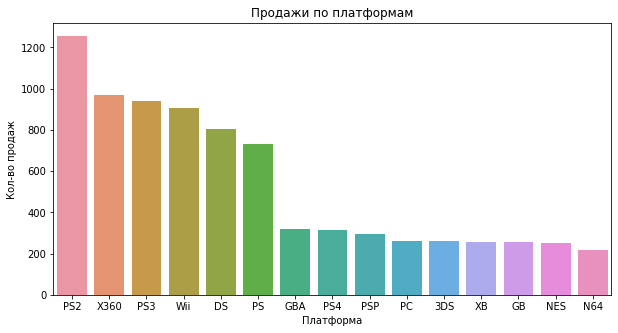

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=rate_platform.head(15).index, y=rate_platform['total_sales'].head(15), ax=ax)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Кол-во продаж')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Супер визуализация! И оси и заголовки подписаны)

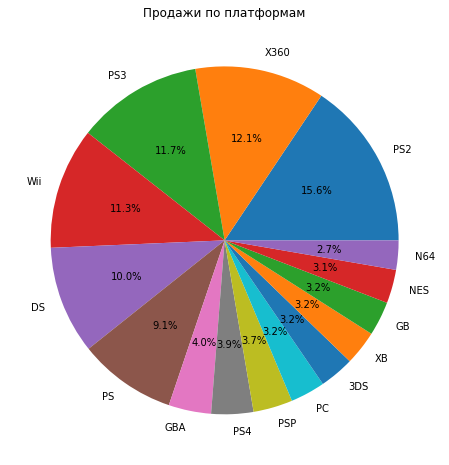

In [32]:
x_pie = rate_platform['total_sales'].head(15)
labels_pie = rate_platform.head(15).index 
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(x=x_pie, labels=labels_pie, autopct='%1.1f%%')
plt.title('Продажи по платформам')

plt.show()

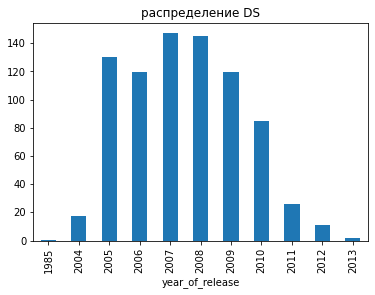

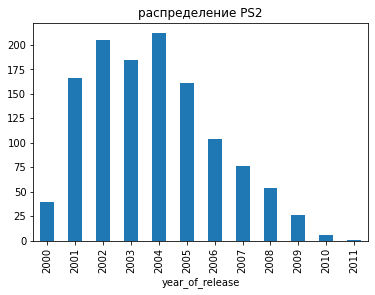

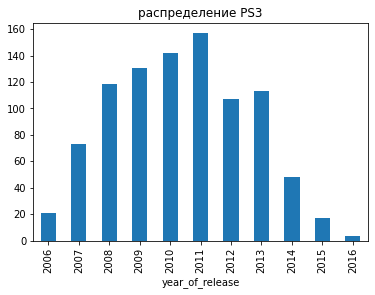

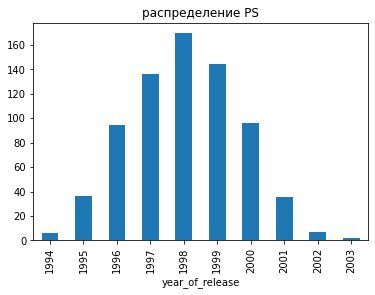

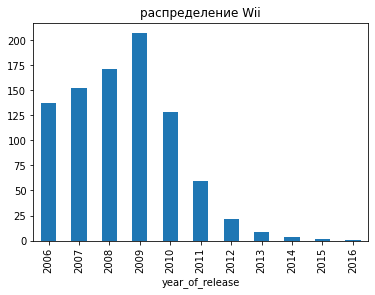

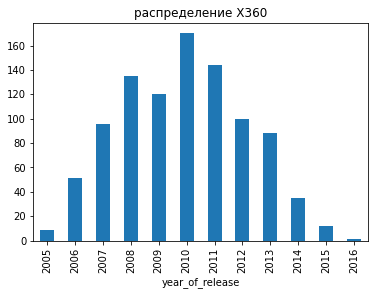

In [33]:
top6 = {'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'}
for platform in top6:
    date_plot = data[data['platform'] == platform].groupby('year_of_release')\
        .agg({'total_sales': 'sum'})
    date_plot.plot(kind='bar', legend=False)
    plt.xticks(ticks=range(len(date_plot)), labels=date_plot.index.astype(int))
    plt.title(f'распределение {platform}')
    plt.show()

In [34]:
rate_platform.head(6).describe()

,total_sales
count,6.000000
mean,935.221667
std,180.709729
min,730.860000
25%,831.467500
50%,923.580000
75%,963.477500
max,1255.770000


__Вывод:__
В результате проведенного исследования были определены 6 наиболее популярных платформ: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.

_PS2:_
- Пик продаж 2001 - 2005 гг, после 2004 года продажи снижались
- В 2011 году зафиксировано минимальное кол-во продаж


_X360:_
- Пик продаж пришёлся на 2010 год, с которого фиксируется падение до 2016 года


_PS3:_
- Аналогная картина с X360, за исключением пика 2013 года и резкого падения так же до 2016 года

_Wii:_
- Пик продаж пришёлся на 2009 год, с которого фиксируется падение до 2016 года


_DS:_
- Пик продаж пришёлся на 2007 - 2008 гг, с которых фиксируется падение до 2011 года


_PS:_
- Пик продаж пришёлся на 1998 гг, с которых фиксируется падение до 2003 года


В общем и целом, можно сделать вывод, что на всех площадках, входящих в топ 6 за всё время, продажи постепенно падали и на данный момент почти потеряли свою актуальность или близки к этому. НО также стоит учитsвать, что данные за 2016 год неполные, в связи с чем стоит делать поправку на то, что количество проданных игр может вырасти в 2016 году по сравнению с 2015. Данных за предыдущие годы будет достаточно для того, чтобы делать выводы.

<div class="alert alert-info">
<b> Согласно графикам, средний срок жизни топовых платформ составил в среднем 8-10 лет, а пиковые значения держались около 5 лет, после чего падили.</b> 
</div>

### Сбор актуальных данных

Чтобы данные были актуальны и можно было бы сделать прогноз на 2017 год, предлагаю взять результаты за последние 3 года, так как игровая индустрия является инновационной, динамичной, быстроразвивающейся и также быстро меняющейся. Поэтому данные за большой промежуток времени могут привести к некорректным выводам.

In [35]:
filtered_data = data.query('year_of_release>=2014')
filtered_data.reset_index(drop=True, inplace=True)
filtered_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,no_rating,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
1685,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01
1687,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,no_rating,0.01


### Анализ платформ за актуальный период

In [36]:
filtered_data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

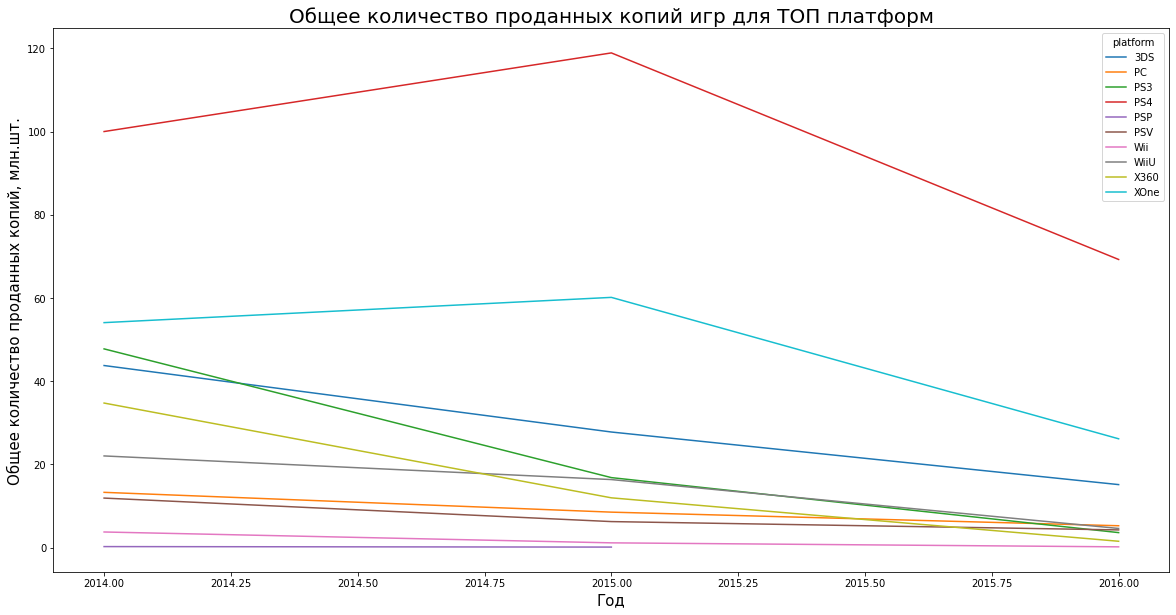

In [37]:
filtered_data.\
    pivot_table(index=['year_of_release'], columns=['platform'], values='total_sales', aggfunc='sum').reset_index().\
        plot(x='year_of_release', figsize=(20,10))
plt.title('Общее количество проданных копий игр для ТОП платформ', fontsize=20)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Общее количество проданных копий, млн.шт.', fontsize=15)
plt.show()

__Вывод:__
- Наиболее популярными платформами за данный период были: PS4 (значительно лидирует), XOne, 3DS;
- Все платформы в данный промежуток времени показали падение в продажах (не забываем, что данные за 2016 год неполые);
- Сервис PSP, видимо, потерял свою актуальность, а часть (Wii) держится на минимуме продаж;
Прибыль формируется от количества продаж, соответственно, нам нужно выбрать такие платформы, где их наибольшее количество. Несмотря на падение в продажах можно выбрать следующие потенциально прибыльные платформы: __PS4, XOne, 3DS__

Проанализировав графики, предлагаю не включать в список результаты 2016 года, так как они плохо сказываются на результатах исследования, ввиду нерелантности информации.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [38]:
filtered_data = filtered_data.query('year_of_release < 2016')
filtered_data['year_of_release'].unique()

<IntegerArray>
[2015, 2014]
Length: 2, dtype: Int64

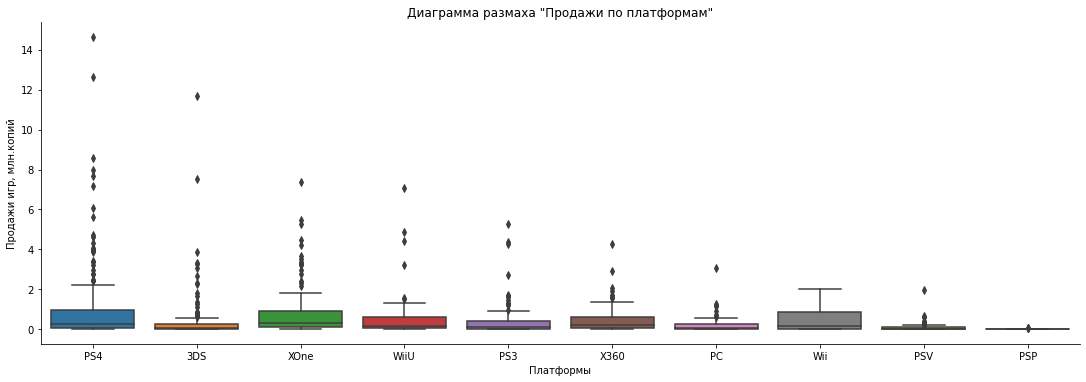

In [39]:
sns.catplot(data=filtered_data, x='platform', y='total_sales', kind='box', aspect=3)
plt.title('Диаграмма размаха "Продажи по платформам"')
plt.xlabel('Платформы')
plt.ylabel('Продажи игр, млн.копий')
plt.show()

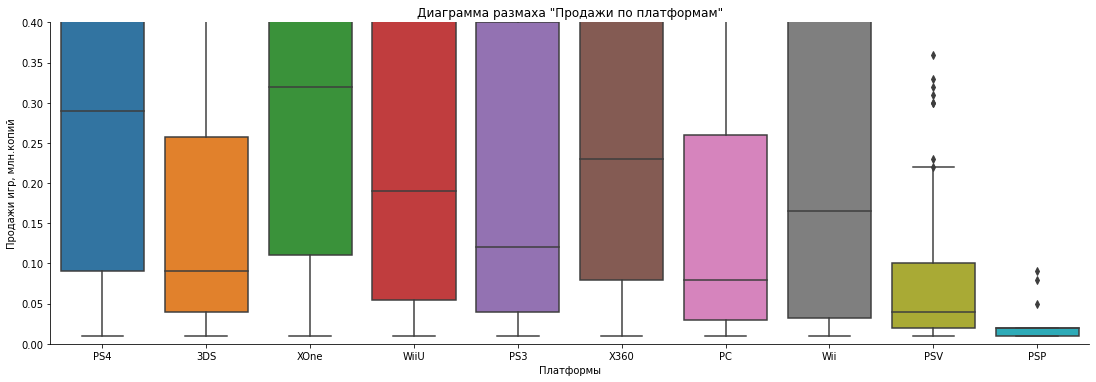

In [40]:
sns.catplot(data=filtered_data, x='platform', y='total_sales', kind='box', aspect=3)
plt.title('Диаграмма размаха "Продажи по платформам"')
plt.xlabel('Платформы')
plt.ylabel('Продажи игр, млн.копий')
plt.ylim(0,0.4)
plt.show()

__Вывод:__
- Исходя из графика, лидирующие позиции занимают PS4 и XOne (обе консоли были выпущены в 2013 году, что говорит о том, что они являются достаточно "свежими";
- Так же популярна платформа WiiU (выпущена в конце 2012 года).

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

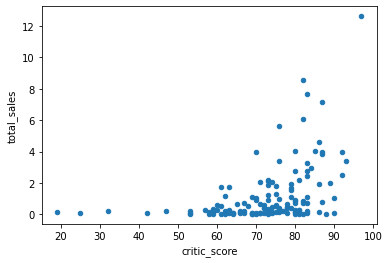

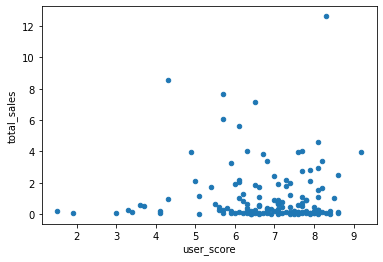

In [41]:
ps4_data = filtered_data.query('platform=="PS4"')
ps4_data.query('critic_score != -1').plot(kind='scatter', x='critic_score', y='total_sales')
ps4_data.query('user_score != -1').plot(kind='scatter', x='user_score', y='total_sales')
plt.show()

In [42]:
critic_score_ps4 = ps4_data.query('critic_score != -1')
user_score_ps4 =  ps4_data.query('user_score != -1')

print('Коэффициент корреляции между глобальными продажими и оценками критиков:', critic_score_ps4['critic_score'].corr(critic_score_ps4['total_sales']))
print('Коэффициент корреляции между глобальными продажими и оценками пользователей:', user_score_ps4['user_score'].corr(user_score_ps4['total_sales']))

Коэффициент корреляции между глобальными продажими и оценками критиков: 0.4290034702738607
Коэффициент корреляции между глобальными продажими и оценками пользователей: 0.005328260777115949


__Вывод:__
- Корреляция в 0.42 между глобальными продажами и оценками критиков считается умеренной. То есть, корреляция небольшая, но есть;
- Судя по результатам, корреляции между продажами и оценками пользователей нет совсем;
- Можно сделать вывод, что оценка критиков, возможно, влияет на продажи.

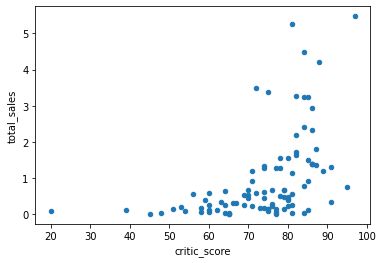

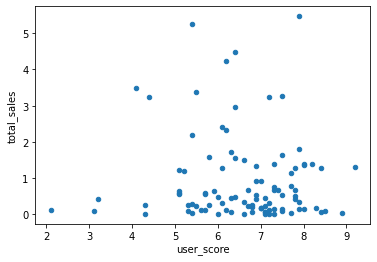

In [43]:
xone_data = filtered_data.query('platform=="XOne"')
xone_data.query('critic_score != -1').plot(kind='scatter', x='critic_score', y='total_sales')
xone_data.query('user_score != -1').plot(kind='scatter', x='user_score', y='total_sales')
plt.show()

In [44]:
critic_score_xone = xone_data.query('critic_score != -1')
user_score_one =  xone_data.query('user_score != -1')

print('Коэффициент корреляции между глобальными продажими и оценками критиков:', critic_score_xone['critic_score'].corr(critic_score_xone['total_sales']))
print('Коэффициент корреляции между глобальными продажими и оценками пользователей:', user_score_one['user_score'].corr(user_score_one['total_sales']))

Коэффициент корреляции между глобальными продажими и оценками критиков: 0.47413765367287475
Коэффициент корреляции между глобальными продажими и оценками пользователей: -0.056545980194161016


___Мини-вывод:___
Можно сказать, что для продаж на всех платформах, незначительно, но оценка критиков влияет на продаваемость, так как коэффициент корреляции Пирсона равен примерно 0.4. Чего нельзя сказать о взаимосвязи между продажами и оценками пользователей, коэффициент корреляции которой близок к нуля, что говорит об отсутствиии вязимосвязи. 

### Анализ распределения игр по жанрам

In [45]:
genre = filtered_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre

,total_sales
genre,
Action,169.25
Shooter,132.72
Sports,85.99
Role-Playing,83.26
Misc,34.95
Racing,24.73
Fighting,23.75
Platform,14.86
Adventure,13.73


Дорогой ревьюер, не мог бы ты, пожалуйста, напомнить, как назвать второй столбец во время использования методы groupby, чтобы к нему можно было обратиться. Помню, там что-то в теории давали, но уже не найду. Заранее спасибо!)

Text(0.5, 1.0, 'Продажи игр по жанрам')

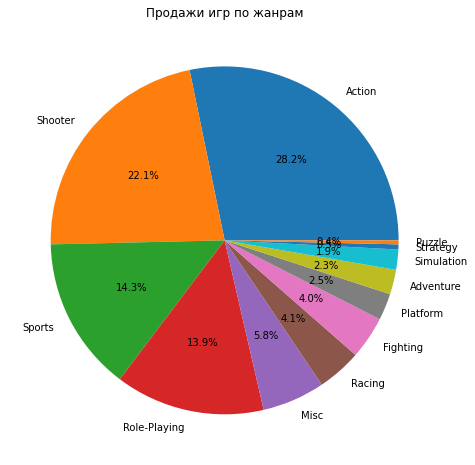

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(x=genre['total_sales'], labels=genre.index, autopct='%1.1f%%')
plt.title('Продажи игр по жанрам')

__Вывод:__
- Наиболее популярными игровыми жанрами являются экшены, шутеры, спортивные и ролевые жанры;
- Также выделяются жанры с наиболее низкими продажами: пазлы, стратегии, симуляторы и приключенческие.

In [47]:
genre_fixed = filtered_data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)
genre_fixed

,total_sales
genre,
Shooter,0.680
Sports,0.360
Platform,0.250
Misc,0.170
Racing,0.170
Simulation,0.160
Fighting,0.130
Action,0.110
Role-Playing,0.110


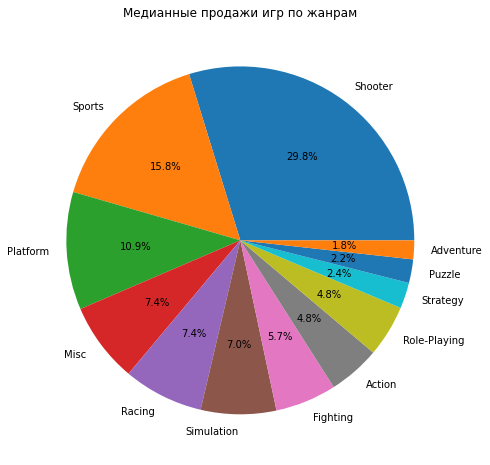

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(x=genre_fixed['total_sales'], labels=genre_fixed.index, autopct='%1.1f%%')
plt.title('Медианные продажи игр по жанрам')
plt.show()

__Исправленный вывод:__
- Наиболее популярными игровыми жанрами являются шутеры и спортивные игры;
- Также выделяются жанры с наиболее низкими продажами: пазлы, стратегии, симуляторы и приключенческие.

## Портрет пользователя для каждого региона

### Портрет пользователя Северной Америки

__Самые популярные платформы (топ-5) в Северной Америке__

In [49]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38


In [50]:
na_user = filtered_data[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating']]
na_user.head()

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,-1.0,-1.0,no_rating
1,Grand Theft Auto V,PS4,2014,Action,3.96,97.0,8.3,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,-1.0,-1.0,no_rating
3,FIFA 16,PS4,2015,Sports,1.12,82.0,4.3,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,-1.0,-1.0,no_rating


In [51]:
na_user_platform = na_user.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_user_platform.head(5)

,na_sales
platform,
PS4,77.12
XOne,67.00
X360,27.61
PS3,21.38
3DS,18.50


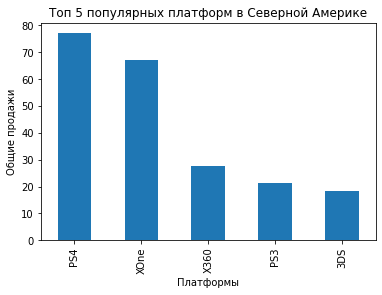

In [52]:
na_user_platform.head(5).plot(kind='bar', legend=False)
plt.title("Топ 5 популярных платформ в Северной Америке")
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

__Вывод:__
Наиболее популярными платформами являются PS4 и XOne - 77 и 67 млн копий соответственно. Как видим, лидерами являются следующие поколения платформ - PS и Xbox.

__Самые популярные жанры (топ-5) в Северной Америке__

In [53]:
na_user_genre = na_user.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_user_genre.head(5)

,na_sales
genre,
Action,63.24
Shooter,62.78
Sports,38.59
Role-Playing,27.58
Misc,14.29


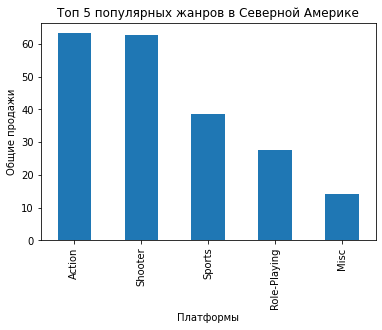

In [54]:
na_user_genre.head(5).plot(kind='bar', legend=False)
plt.title("Топ 5 популярных жанров в Северной Америке")
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

__Вывод:__
Наиболее популярными жанрами являются action, shooter и sports. Как видим, экшен и шутер жанры по популярности примерно одинковы. Оба жанра являются одними из самых динамичных и увлекательных, поэтому данный результат не удивителен.

__Влияние рейтинга ESRB на продажи в Северной Америке__

In [55]:
na_user_rating = na_user.query('rating != -1')

In [56]:
na_user_rating = na_user_rating.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_user_rating.head(5)

,na_sales
rating,
M,80.75
no_rating,56.19
E,42.77
T,30.00
E10+,29.42


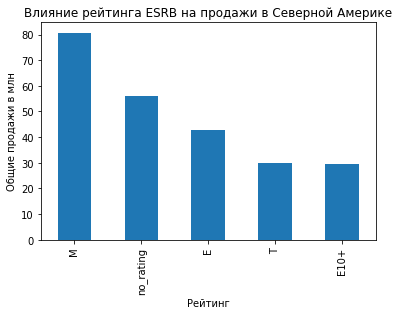

In [57]:
na_user_rating.head(5).plot(kind='bar', legend=False)
plt.title("Влияние рейтинга ESRB на продажи в Северной Америке")
plt.xlabel('Рейтинг')
plt.ylabel('Общие продажи в млн')
plt.show()

__Вывыд:__
Рейтинг коррелирует с продажами. Так, игры с рейтингом M - наиболее продаваемые (80 млн продаж), на втором месте по популярности разместился рейтинг E.
 - M: Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 
 - E: Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
 - T: Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
 - E 10+: Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.

### Портрет пользователя Европы

__Самые популярные платформы (топ-5) в Европе__

In [58]:
eu_user = filtered_data[['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating']]
eu_user.head()

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,-1.0,-1.0,no_rating
1,Grand Theft Auto V,PS4,2014,Action,6.31,97.0,8.3,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3.49,-1.0,-1.0,no_rating
3,FIFA 16,PS4,2015,Sports,6.12,82.0,4.3,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,3.49,-1.0,-1.0,no_rating


In [59]:
eu_user_platform = eu_user.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_user_platform.head(5)

,eu_sales
platform,
PS4,98.26
XOne,36.62
PS3,24.28
X360,14.78
PC,14.44


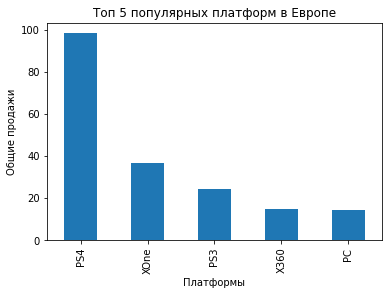

In [60]:
eu_user_platform.head(5).plot(kind='bar', legend=False)
plt.title("Топ 5 популярных платформ в Европе")
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

__Вывод:__
Наиболее популярными платформами являются всё так же являются PS4 и XOne, но пропорция сильно отличается от пользователй Северной Америки. PS4 значимо превосходит в продажах другие платформы, являясь абсолютным лидером

__Самые популярные жанры (топ-5) в Европе__

In [61]:
eu_user_genre = eu_user.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_user_genre.head(5)

,eu_sales
genre,
Action,64.00
Shooter,49.62
Sports,33.72
Role-Playing,23.89
Racing,12.36


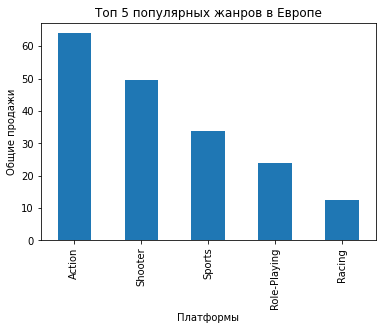

In [62]:
eu_user_genre.head(5).plot(kind='bar', legend=False)
plt.title("Топ 5 популярных жанров в Европе")
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

__Вывод:__
Наиболее популярными жанрами также являются action, shooter и sports, но разница между ними не такая большая. Как видим, экшен и шутер жанры по популярности примерно одинковы.

__Влияние рейтинга ESRB на продажи в Европе__

In [63]:
eu_user_rating = eu_user.query('rating != -1')

In [64]:
eu_user_rating = eu_user_rating.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_user_rating.head(5)

,eu_sales
rating,
M,76.90
no_rating,51.48
E,44.45
T,24.28
E10+,22.35


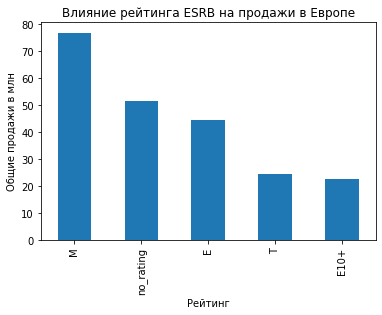

In [65]:
eu_user_rating.head(5).plot(kind='bar', legend=False)
plt.title("Влияние рейтинга ESRB на продажи в Европе")
plt.xlabel('Рейтинг')
plt.ylabel('Общие продажи в млн')
plt.show()

__Вывод:__
Картина такая же, как и с Северной Америкой, игры с рейтингом M - наиболее продаваемые
 - M: Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 
 - E: Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
 - T: Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
 - E 10+: Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.

### Портрет пользователя Японии

In [66]:
jp_user = filtered_data[['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating']]
jp_user.head()

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,-1.0,-1.0,no_rating
1,Grand Theft Auto V,PS4,2014,Action,0.38,97.0,8.3,M
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3.10,-1.0,-1.0,no_rating
3,FIFA 16,PS4,2015,Sports,0.06,82.0,4.3,E
4,Star Wars Battlefront (2015),PS4,2015,Shooter,0.22,-1.0,-1.0,no_rating


In [67]:
jp_user_platform = jp_user.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_user_platform.head(5)

,jp_sales
platform,
3DS,36.21
PSV,10.98
PS3,9.92
PS4,9.28
WiiU,6.64


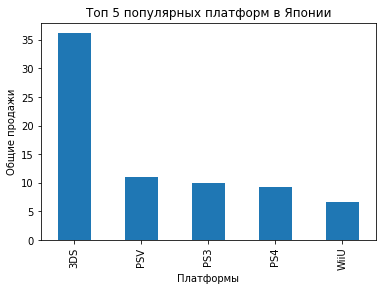

In [68]:
jp_user_platform.head(5).plot(kind='bar', legend=False)
plt.title("Топ 5 популярных платформ в Японии")
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

__Вывод:__
В Японии наиболее популярной платформой является 3DS, это связано с тем, что компания Nintendo, производящая 3DS, является японской. В этом же ключе можно объяснить наличие платформы WiiU в топе, которая тоже является консолью компании Nintendo.
Можно заметить, что на втором месте находится PSV - следующее поколение консоли Play Station.

__Самые популярные жанры (топ-5) в Японии__

In [69]:
jp_user_genre = jp_user.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_user_genre.head(5)

,jp_sales
genre,
Role-Playing,24.55
Action,22.51
Fighting,5.62
Misc,4.57
Shooter,3.81


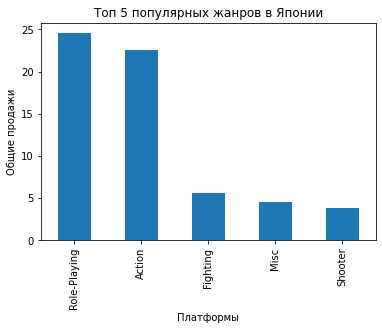

In [70]:
jp_user_genre.head(5).plot(kind='bar', legend=False)
plt.title("Топ 5 популярных жанров в Японии")
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()

__Вывод:__
Наиболее популярными жанрами являются ролевой и экшн, можно предположить что ролевой жанр популярен, потому что в Японии распространена культура аниме, манги и косплей-фестивалей. В топе также жанр боёв (возможно, связано с культурой винов-самураев)

__Влияние рейтинга ESRB на продажи в Японии__

In [71]:
jp_user_rating = jp_user.query('rating != -1')

In [72]:
jp_user_rating = jp_user_rating.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_user_rating.head(5)

,jp_sales
rating,
no_rating,42.58
T,12.51
E,7.87
M,6.81
E10+,4.01


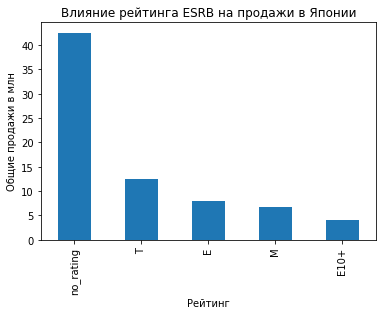

In [73]:
jp_user_rating.head(5).plot(kind='bar', legend=False)
plt.title("Влияние рейтинга ESRB на продажи в Японии")
plt.xlabel('Рейтинг')
plt.ylabel('Общие продажи в млн')
plt.show()

__Вывод:__
В Японии наиболее покупаем рейтинг T, что означает, что аудитория тяготеет к менее жестоким играм, возможно, ввиду культуры страны.
 - M: Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 
 - E: Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
 - T: Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
 - E 10+: Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Полностью поддерживаю) 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нам предстоит проверить, равны ли пользовательские рейтинги двух платформ XOne и PC. 

In [74]:
hypothesis1 = data[['platform', 'user_score', 'year_of_release']]
hypothesis1 = hypothesis1.query('user_score != -1')
hypothesis1 = hypothesis1.query('2016 > year_of_release >= 2014')

1. Формулирование гипотез

H0: Пользовательские рейтинги XOne и PC равны

H1: Пользовательские рейтинги XOne и PC не равны

2. Для проверки гипотез используеют двухвыборочный t-тест (так как в альтернативной гипотизе мы указалаи неравенство, что подразумевает, что мможно получить такое, или ещё более далёкое значение p(value), что говорит о двусторонности). Если необходимо проверить равенство средних двух независимых совокупностей, то используется функция stats.ttest_ind.
3. Альфа-уровень определяет вероятность ошибочного отклонения истинной нулевой гипотезы.  Уровень значимости альфа был выбран 0.05, так как он является наиболее часто используемым.

In [75]:
xone = hypothesis1.query('platform == "XOne"')
pc = hypothesis1.query('platform == "PC"')

alpha = 0.05
results_1 = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)
print('Уровень значимости:', results_1.pvalue)


if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Уровень значимости: 0.2064150169331124
Не получилось отвергнуть нулевую гипотезу


Исходя из результатов, мы не можем отвергнуть нулевую гипотезу, а значит, что пользовательские рейтинги XOne и PC могут быть равны.

### Средние пользовательские рейтинги жанров Action и Sports разные.

In [76]:
hypothesis2 = data[['genre', 'user_score', 'year_of_release']]
hypothesis2 = hypothesis2.query('user_score != -1')
hypothesis2 = hypothesis2.query('2016 > year_of_release >= 2014')

1. Формулирование гипотез

H0: Средние пользовательские рейтинги жанров Action и Sports одинковые

H1: Средние пользовательские рейтинги жанров Action и Sports разные

2. Для проверки гипотез используеют двухвыборочный t-тест (так как в альтернативной гипотизе мы указалаи неравенство, что подразумевает, что мможно получить такое, или ещё более далёкое значение p(value), что говорит о двусторонности). Если необходимо проверить равенство средних двух независимых совокупностей, то используется функция stats.ttest_ind.
3. Альфа-уровень определяет вероятность ошибочного отклонения истинной нулевой гипотезы.  Уровень значимости альфа был выбран 0.05, так как он является наиболее часто используемым.

In [77]:
action = hypothesis2.query('genre == "Action"')
sports = hypothesis2.query('genre == "Sports"')

alpha = 0.05
results_1 = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
print('Уровень значимости:', results_1.pvalue)


if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Уровень значимости: 5.639159825656943e-13
Отвергаем нулевую гипотезу


По результатам теста нулевая гипотеза была отвергнута, а значит, что пользовательские рейтинги двух жанров разные

## Общий вывод

1. Пик выпускаемых игр пришёлся на 2008 - 2009 год;
2. Наиболее популярные платформы за всё время продаж - PS2 и X360, но в последние годы они устарели, и их заменили новые поколения - PS4 и XBox;
3. Наиболее релевантными данными для прогноза на 2017 год оказались продажи за 2014 и 2015 годы;
4. Наиболее популярными игровыми жанрами являются экшены, шутеры, спортивные и ролевые жанры;
5. Пользователи Северной Америки и стран Европы, в целом, похожи по качеству потребления контента: наиболее популярные платформы - PS4 и XBox, наиболее популярные жанры - action, shooter и sports, наиболее продаваемыми играми оказались игры с рейтингом M, e и Т;
6. Картина японского рынка заметно отличается - наиболее популярной платформой оказалось - японская 3DS, наиболее популярные жанры - ролевой и экшен. Самый популярный рейтинг - T.